1\. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [ ]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt

Generation of the dataset:


In [ ]:
N=1000
x1= np.random.normal(0, 1,N).T
x2 = x1 + np.random.normal(0, 3,N).T
x3 = 2*x1 + x2
dataset = np.array([x1,x2,x3])

Finding the eigenvectors and eigenvalues of the covariance matrix of the dataset


In [ ]:
cov=np.cov(dataset)
l, V = la.eig(cov)
print("results with np.eig:")
print ("the 3 eigenvalues : " ,l)
print ("the 3 eigenvectors correspondents (one per column):\n",V)


results with np.eig:
the 3 eigenvalues :  [ 2.57079887e+01+0.j -2.13760259e-15+0.j  2.07050113e+00+0.j]
the 3 eigenvectors correspondents (one per column):
 [[-0.11898987 -0.81649658  0.56495552]
 [-0.57293651 -0.40824829 -0.71068776]
 [-0.81091625  0.40824829  0.41922329]]


Findng the eigenvectors and eigenvalues using SVD:

In [ ]:
print("\nresults with la.svd:")
U, spectrum, Vt = la.svd(cov)
print ("the 3 eigenvalues : " ,spectrum)
print ("the 3 eigenvectors correspondents (one per column):\n",Vt)



results with la.svd:
the 3 eigenvalues :  [2.57079887e+01 2.07050113e+00 4.02388779e-15]
the 3 eigenvectors correspondents (one per column):
 [[-0.11898987 -0.57293651 -0.81091625]
 [ 0.56495552 -0.71068776  0.41922329]
 [ 0.81649658  0.40824829 -0.40824829]]


The difference between the two outcomes is negligible, approximately 10**-2.

Percent of the total dataset's variability explained by the principal components:

In [ ]:
print("\ncalcul of the percent of the variability:")
Lambda=np.diag(l)
print ("\ncov.trace():", cov.trace())
print ("Lambda.trace():", Lambda.trace())
print ("variability percent :",Lambda[0,0]/Lambda.trace())


calcul of the percent of the variability:

cov.trace(): 27.778489834027788
Lambda.trace(): (27.778489834027788+0j)
variability percent : (0.9254638698461719+0j)


reducing the dataset dimension

In [ ]:
dataset_reduced = dataset[0:2,:]
cov_r=np.cov(dataset_reduced)
l_r, V_r = la.eig(cov_r)
Lambda_r=np.diag(l_r)
print ("\ncov_r.trace():", cov_r.trace())
print ("Lambda_r.trace():", Lambda_r.trace())
print ("variability percent with a reduced dataset :",Lambda_r[0,0]/Lambda_r.trace())


cov_r.trace(): 10.509411102197118
Lambda_r.trace(): (10.50941110219712+0j)
variability percent with a reduced dataset : (0.08808033993174816+0j)


Redefining the data in the basis yielded by the PCA procedure and rotating all the data points accordingly to the new base

In [ ]:
l01, V01 = np.linalg.eig(np.dot(dataset[0:2,:], dataset[0:2,:].T)/(N-1))
Xp01 = np.dot(V01.T, dataset[0:2,:])


l02, V02 = np.linalg.eig(np.dot(dataset[0:3:2,:], dataset[0:3:2,:].T)/(N-1))
Xp02 = np.dot(V02.T, dataset[0:3:2,:])


l12, V12 = np.linalg.eig(np.dot(dataset[1:3,:], dataset[1:3,:].T)/(N-1))
Xp12 = np.dot(V12.T, dataset[1:3,:])


plot

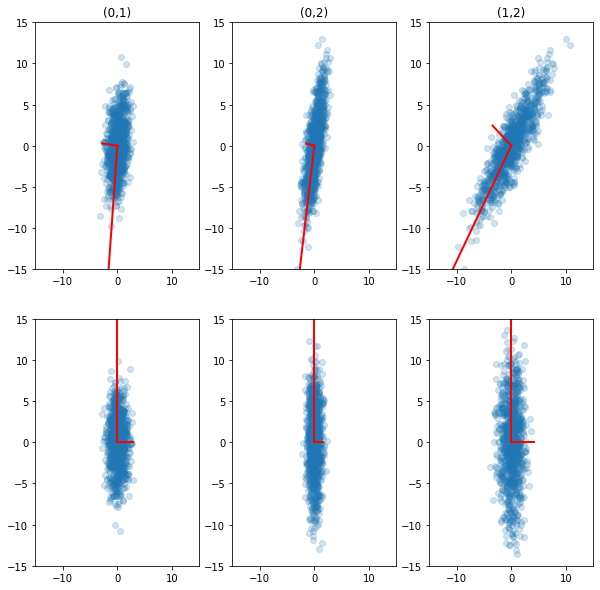

In [ ]:
scale_factor=3
fig=plt.figure(figsize=(10,10))

fig.add_subplot(2, 3,1)

plt.scatter(dataset[0,:], dataset[1,:], alpha=0.2)
for li, vi in zip(l01, V01.T):
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]] ,'r-', lw=2)

plt.axis([-15,15,-15,15])
plt.title('(0,1)');

fig.add_subplot(2, 3,2)

plt.scatter(dataset[0,:], dataset[2,:], alpha=0.2)

for li, vi in zip(l02, V02.T):
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)

plt.axis([-15,15,-15,15])
plt.title('(0,2)');


fig.add_subplot(2, 3,3)

plt.scatter(dataset[1,:], dataset[2,:], alpha=0.2)

for li, vi in zip(l12, V12.T):
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)

plt.axis([-15,15,-15,15])
plt.title('(1,2)');


fig.add_subplot(2, 3,4)
plt.scatter(Xp01[0,:], Xp01[1,:], alpha=0.2)
for li, vi in zip(l01,  np.diag([1]*2)):
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
plt.axis([-15,15,-15,15]);

fig.add_subplot(2, 3,5)
plt.scatter(Xp02[0,:], Xp02[1,:], alpha=0.2)
for li, vi in zip(l02,  np.diag([1]*2)):
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
plt.axis([-15,15,-15,15]);

fig.add_subplot(2, 3,6)
plt.scatter(Xp12[0,:], Xp12[1,:], alpha=0.2)
for li, vi in zip(l12,  np.diag([1]*2)):
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
plt.axis([-15,15,-15,15]);

2\. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

Data prep


In [ ]:
dataset_n = np.array([ x + np.sum(np.random.normal(0, 0.05,10)) for x in dataset ])
print ("dataset with noise : \n",dataset_n)

dataset with noise : 
 [[-0.29187773  0.0461855  -0.99728565 ... -0.4511684  -0.14257237
  -1.28970039]
 [ 2.959207    4.41995351 -5.19947471 ...  1.16018684  4.5797072
  -2.05160407]
 [ 2.14578603  4.28265899 -7.42371152 ...  0.02818453  4.06489695
  -4.86067036]]


Redefining the data in the basis yielded by the PCA procedure and rotating all the data points accordingly to the new base

In [ ]:
l01, V01 = np.linalg.eig(np.dot(dataset_n[0:2,:], dataset_n[0:2,:].T)/(N-1))
Xp01 = np.dot(V01.T, dataset_n[0:2,:])

l02, V02 = np.linalg.eig(np.dot(dataset_n[0:3:2,:], dataset_n[0:3:2,:].T)/(N-1))
Xp02 = np.dot(V02.T, dataset_n[0:3:2,:])

l12, V12 = np.linalg.eig(np.dot(dataset_n[1:3,:], dataset_n[1:3,:].T)/(N-1))
Xp12 = np.dot(V12.T, dataset_n[1:3,:])


plot

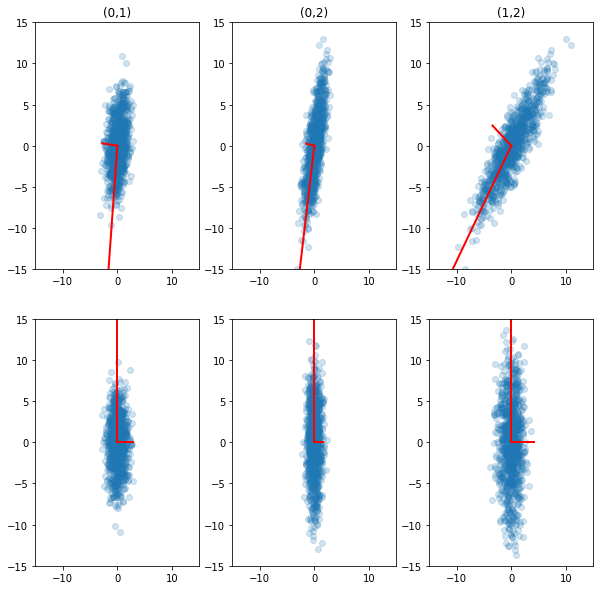

In [ ]:
scale_factor=3
fig=plt.figure(figsize=(10,10))

fig.add_subplot(2, 3,1)

plt.scatter(dataset_n[0,:], dataset_n[1,:], alpha=0.2)
for li, vi in zip(l01, V01.T):
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]] ,'r-', lw=2)

plt.axis([-15,15,-15,15])
plt.title('(0,1)');


fig.add_subplot(2, 3,2)

plt.scatter(dataset_n[0,:], dataset_n[2,:], alpha=0.2)

for li, vi in zip(l02, V02.T):
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)

plt.axis([-15,15,-15,15])
plt.title('(0,2)');

fig.add_subplot(2, 3,3)

plt.scatter(dataset_n[1,:], dataset_n[2,:], alpha=0.2)

for li, vi in zip(l12, V12.T):
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)

plt.axis([-15,15,-15,15])
plt.title('(1,2)');



fig.add_subplot(2, 3,4)
plt.scatter(Xp01[0,:], Xp01[1,:], alpha=0.2)

for li, vi in zip(l01,  np.diag([1]*2)):
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
plt.axis([-15,15,-15,15]);


fig.add_subplot(2, 3,5)
plt.scatter(Xp02[0,:], Xp02[1,:], alpha=0.2)

for li, vi in zip(l02,  np.diag([1]*2)):
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
plt.axis([-15,15,-15,15]);


fig.add_subplot(2, 3,6)
plt.scatter(Xp12[0,:], Xp12[1,:], alpha=0.2)

for li, vi in zip(l12,  np.diag([1]*2)):
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
plt.axis([-15,15,-15,15]);

3\. **Optional**: PCA on the MAGIC dataset

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 